### PCA tutorial in the footsteps of 'Introduction to Machine Learning with Python' by Andreas Muller and Sarah Guido -- using sklearn breast cancer dataset

In [10]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

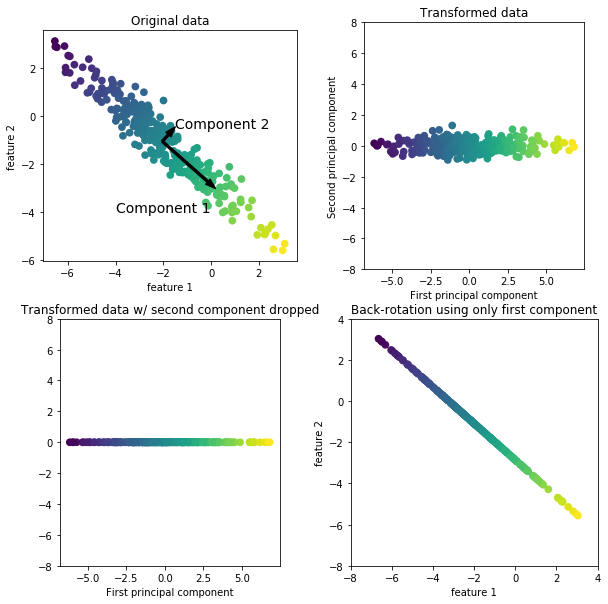

In [6]:
mglearn.plots.plot_pca_illustration()

This just shows some generic data with two components. Principal components are found, the second is then dropped as it accounts for less of the variation (a key step in dimensionality reduction) and then on return to the original measured components we see that the first principal component is actually a linear combination of the two original features.

Here we will look at a breast cancer dataset: malignant or benign labels are given to the data, and a large number of features (30) are recorded for each case. 

Below is a plot of histograms for the features, classified in to malignant or benign. 

# Loading the data

Before we do anything, let's explore the breast cancer data.

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys(): \n{}'.format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [14]:
print('Shape of breast cancer data: \n{}'.format(cancer.data.shape))

Shape of breast cancer data: 
(569, 30)


In [15]:
print('Sample counts per target class: \n{}'.format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per target class: 
{'malignant': 212, 'benign': 357}


In [16]:
print('Feature names: \n{}'.format(cancer.feature_names))

Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


These are all 30 of the feature names. Now, let's look at the histograms of this data, when classfication in to malignant or benign is performed.

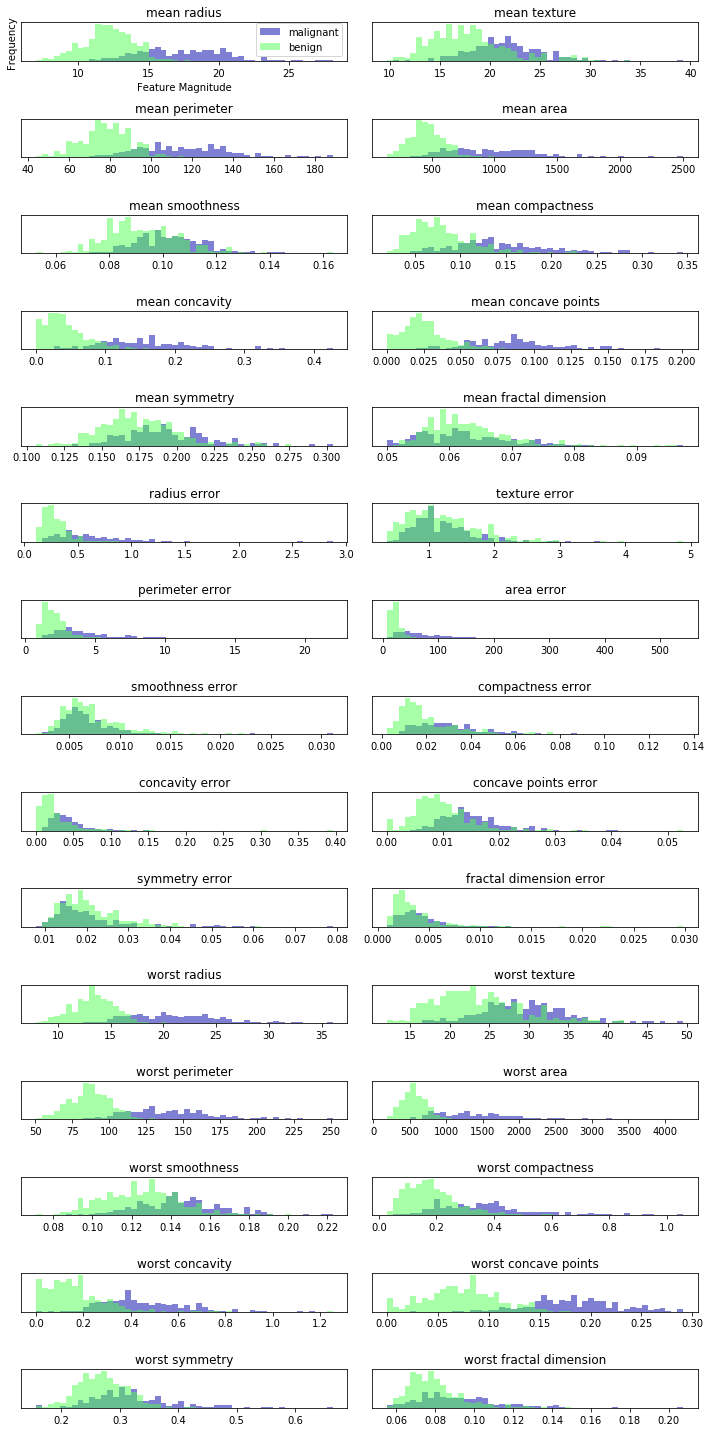

In [20]:
fig, axes = plt.subplots(15,2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

#make axes 1D
ax = axes.ravel()

for i in range(30):
    #find the bin edges where 50 equally sized bins are chosen for each feature
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:,i], bins = bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:,i], bins = bins, color = mglearn.cm3(2), alpha = 0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel('Feature Magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc = 'best')
fig.tight_layout()

So, for example, symmetry error and smoothness error seem a bit pointless, but radius seems useful for classifcation. We want to find two main principal components so that we can plot this data in 2D, for example. (In reality, this could be more, I guess. But ideally a reduction from 30 would be helpful). 

## Scaling features

First, for PCA to work, need to scale all the features so that the variance of everything is one. Otherwise, one of the features that corresponds to larger numbers will automatically appear as a principal component despite having a smaller variance. For this, we can use the StandardScaler(), for which a small example is presented below. 

In [24]:
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [25]:
print(scaler.mean_) #note: trailing underscore to break conflict with a keyword

[0.5 0.5]


In [28]:
print(scaler.var_) 

[0.25 0.25]


In [26]:
print(scaler.transform(data)) #printing the rescaled input data

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [27]:
print(scaler.transform([[2,2]])) #subtract mean and divide by standard deviation.

[[3. 3.]]


### Scale the Breast Cancer features

In [30]:
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

## Use sklearn to find the principal components

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #only keep the first two principal components so we can make a 2D plot

Run the pca model on the breast cancer data.

In [34]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
#transform the scaled breast cancer data on to the first two principal components
X_pca = pca.transform(X_scaled)
print('Original shape: \n{}'.format(str(X_scaled.shape)))
print('Reduced shape: \n{}'.format(str(X_pca.shape)))

Original shape: 
(569, 30)
Reduced shape: 
(569, 2)


So, two main components have been found and the data projected on to them (essentially by taking a 30x30 matrix and finding the eigenvalues). Let's take a look at what these principal components might be in terms of our original feature space?

In [40]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


This is obviously unintelligible, although it would be interesting to see if the intuition about which features in the original data are 'useless' is correct. 

In [64]:
c = pca.components_[0,:]

In [65]:
d = pca.components_[1,:]

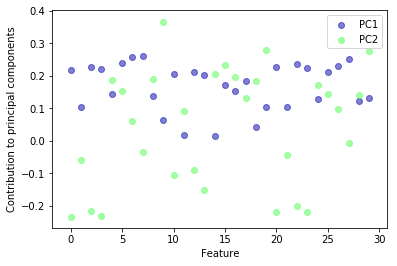

In [69]:
plt.scatter(range(30), c, color = mglearn.cm3(0), alpha = .5)
plt.scatter(range(30), d, color = mglearn.cm3(2), alpha = .5)
ax2 = plt.gca()
ax2.set_xlabel('Feature')
ax2.set_ylabel('Contribution to principal components')
ax2.legend(['PC1', 'PC2'], loc = 'best')

SO, for example, feature 20, or 'mean fractal dimension', contributes very little to PC2, but rather more to PC1. 

## Plotting data according to the first two principal components. 

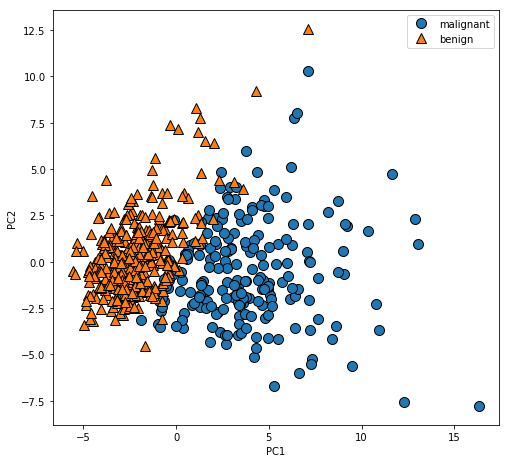

In [74]:
#plot first vs.second principal component, coloring the results by the target class. 
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1], cancer.target)
ax3 = plt.gca()
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_aspect('equal')
ax3.legend(cancer.target_names, loc = 'best')

From this, even placing a single line on the data plane might give us a convenient way to classify unlabelled data. However, some more work needs to be done to clarify the probability of a tumour being malignant or benign given its position on this plot. 

Just to make another pretty plot, let's look at the principal components' composition from the original feature space using a heat plot. 

Text(0,0.5,'Principal Component')

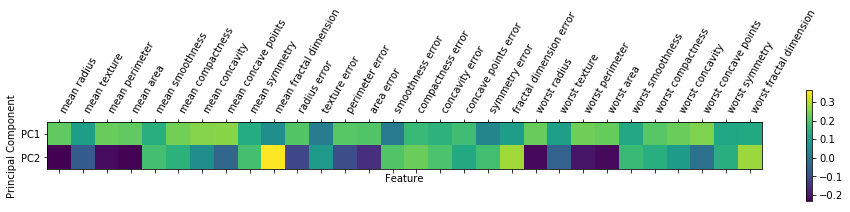

In [75]:
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['PC1', 'PC2'])
plt.colorbar()
plt.xticks(range(30), cancer.feature_names, rotation = 60, ha = 'left')
plt.xlabel('Feature')
plt.ylabel('Principal Component')

Generally, for PC1, everything has a positive sign -- all components have some kind of correlation with each other. 